In [7]:
import os 
import pandas as pd

from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
from collections import Counter
import seaborn as sn
import random
import matplotlib.pyplot as plt

import numpy as np

In [2]:
box_file_dir = os.path.join(os.getcwd(), "..", "..", "Box")
file_path_csv = os.path.join(box_file_dir, "covid_pts_enc_level_labs_dx_2021-02-02_deid.csv")

In [3]:
df = pd.read_csv(file_path_csv, index_col=False)

In [4]:
df.head()

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,White,White Hispanic,...,False,False,False,False,False,False,NaN,4dMaH,61003,10650
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,White,White Hispanic,...,False,False,False,False,False,False,3.0,8wQnr,84969,27818
2,2020-03-25 13:25:00,2020-03-30 03:48:00,Medical Center,IP Private/Semi Private room,80,Female,78758,Not Hispanic or Latino,Black or African American,Other race Non Hispanic,...,True,False,True,True,True,False,1.0,6YGuu,69112,34412
3,2020-03-25 13:36:00,2020-03-27 13:15:00,Medical Center,IP Private/Semi Private room,56,Male,78746,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,1.0,P1Tjg,84820,37981
4,2020-03-25 13:43:00,2020-03-27 12:44:00,Medical Center,IP Private/Semi Private room,46,Female,78757,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,0.0,iouKO,76686,41152


In [5]:
all_df_list = []

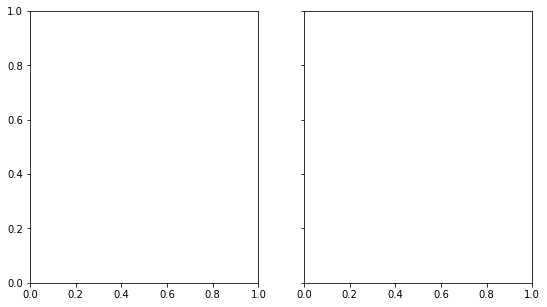

In [8]:
f, axs = plt.subplots(1,2,
                      figsize=(9,5),
                      sharey=True)

### Lottery 

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,233,6.866953,8.583691,50.214592,48.068670,15.879828,18.454936,18.025751,9.012876,lottery,0.0
1,Black or African American,50,12.000000,14.000000,58.000000,40.000000,20.000000,8.000000,38.000000,8.000000,lottery,0.0
2,White,145,7.586207,6.896552,49.655172,44.137931,8.275862,10.344828,14.482759,5.517241,lottery,0.0
3,Asian,7,14.285714,0.000000,57.142857,42.857143,28.571429,28.571429,28.571429,0.000000,lottery,0.0
4,Unknown,14,7.142857,14.285714,85.714286,71.428571,7.142857,7.142857,7.142857,0.000000,lottery,0.0
5,Other Race,29,0.000000,3.448276,55.172414,48.275862,13.793103,20.689655,27.586207,10.344828,lottery,0.0
6,American Indian/Alaska Native,3,0.000000,0.000000,66.666667,66.666667,0.000000,0.000000,0.000000,0.000000,lottery,0.0
7,Decline to Specify,6,33.333333,0.000000,50.000000,50.000000,0.000000,16.666667,16.666667,16.666667,lottery,0.0


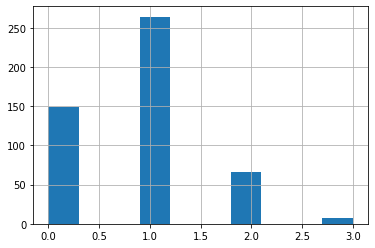

In [6]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/lottery_0.0.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100
out_df['type'] = 'lottery'
out_df['threshold'] = 0.0
all_df_list.append(out_df)
print(mortality_lot_1['qSOFA_score'].hist())
out_df

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


AxesSubplot(0.125,0.125;0.775x0.755)


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,197,7.106599,8.121827,51.269036,49.238579,16.243655,16.751269,18.274112,9.137056,lottery,0.2
1,Black or African American,42,11.904762,14.285714,52.380952,45.238095,19.047619,9.523810,30.952381,9.523810,lottery,0.2
2,Unknown,11,9.090909,18.181818,72.727273,63.636364,0.000000,9.090909,9.090909,0.000000,lottery,0.2
3,Asian,6,16.666667,0.000000,50.000000,50.000000,33.333333,33.333333,33.333333,0.000000,lottery,0.2
4,Other Race,27,0.000000,3.703704,55.555556,48.148148,14.814815,22.222222,29.629630,11.111111,lottery,0.2
5,White,109,10.091743,7.339450,52.293578,44.036697,8.256881,11.926606,13.761468,5.504587,lottery,0.2
6,American Indian/Alaska Native,2,0.000000,0.000000,50.000000,50.000000,0.000000,0.000000,0.000000,0.000000,lottery,0.2
7,Decline to Specify,6,33.333333,0.000000,50.000000,50.000000,0.000000,16.666667,16.666667,16.666667,lottery,0.2


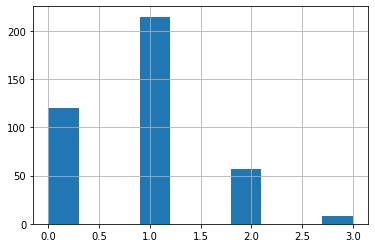

In [7]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/lottery_0.2.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100
out_df['type'] = 'lottery'
out_df['threshold'] = 0.2
all_df_list.append(out_df)
print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Unknown,8,0.000000,25.000000,62.500000,75.000000,0.000000,0.000000,0.000000,0.000000,lottery,0.4
1,Hispanic,159,6.918239,7.547170,53.459119,47.798742,14.465409,19.496855,19.496855,9.433962,lottery,0.4
2,American Indian/Alaska Native,2,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,lottery,0.4
3,White,90,8.888889,5.555556,55.555556,43.333333,8.888889,12.222222,13.333333,5.555556,lottery,0.4
4,Black or African American,31,12.903226,16.129032,41.935484,41.935484,22.580645,6.451613,38.709677,9.677419,lottery,0.4
5,Other Race,18,0.000000,0.000000,44.444444,50.000000,22.222222,27.777778,33.333333,11.111111,lottery,0.4
6,Decline to Specify,6,33.333333,0.000000,50.000000,50.000000,0.000000,16.666667,16.666667,16.666667,lottery,0.4
7,Asian,3,33.333333,0.000000,66.666667,66.666667,33.333333,33.333333,33.333333,0.000000,lottery,0.4


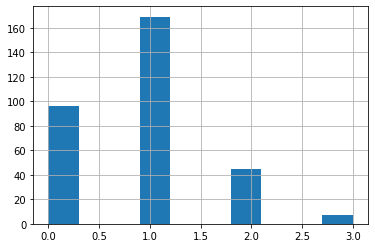

In [8]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/lottery_0.4.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'lottery'
out_df['threshold'] = 0.4
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


AxesSubplot(0.125,0.125;0.775x0.755)


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,White,66,9.090909,6.060606,50.000000,40.909091,7.575758,12.121212,12.121212,6.060606,lottery,0.6
1,Hispanic,108,7.407407,8.333333,50.000000,53.703704,10.185185,14.814815,14.814815,9.259259,lottery,0.6
2,Unknown,6,0.000000,16.666667,66.666667,83.333333,16.666667,0.000000,0.000000,0.000000,lottery,0.6
3,Black or African American,20,15.000000,20.000000,35.000000,35.000000,20.000000,5.000000,35.000000,15.000000,lottery,0.6
4,Decline to Specify,6,33.333333,0.000000,50.000000,50.000000,0.000000,16.666667,16.666667,16.666667,lottery,0.6
5,Other Race,14,0.000000,0.000000,42.857143,42.857143,21.428571,35.714286,42.857143,7.142857,lottery,0.6
6,Asian,2,0.000000,0.000000,100.000000,50.000000,50.000000,50.000000,50.000000,0.000000,lottery,0.6
7,American Indian/Alaska Native,1,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,lottery,0.6


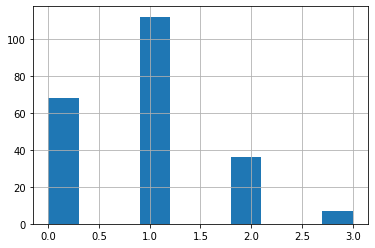

In [9]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/lottery_0.6.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100
out_df['type'] = 'lottery'
out_df['threshold'] = 0.6
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,54,7.407407,3.703704,42.592593,48.148148,7.407407,14.814815,20.370370,9.259259,lottery,0.8
1,Black or African American,14,14.285714,7.142857,50.000000,21.428571,21.428571,7.142857,57.142857,7.142857,lottery,0.8
2,Other Race,12,0.000000,0.000000,33.333333,33.333333,8.333333,25.000000,33.333333,8.333333,lottery,0.8
3,White,37,13.513514,13.513514,48.648649,37.837838,8.108108,16.216216,16.216216,2.702703,lottery,0.8
4,Decline to Specify,2,50.000000,0.000000,50.000000,50.000000,0.000000,50.000000,50.000000,0.000000,lottery,0.8
5,Unknown,1,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,lottery,0.8
6,Asian,1,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,lottery,0.8


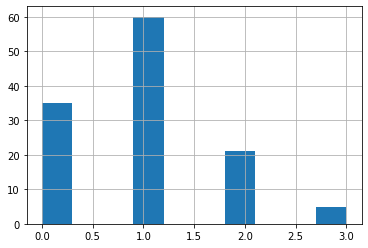

In [10]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/lottery_0.8.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'lottery'
out_df['threshold'] = 0.8
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,White,15,0.0,0.000000,40.000000,40.000000,0.000000,6.666667,20.000000,0.000000,lottery,1.0
1,Hispanic,12,0.0,8.333333,58.333333,66.666667,8.333333,8.333333,16.666667,8.333333,lottery,1.0
2,Unknown,4,0.0,25.000000,75.000000,75.000000,50.000000,25.000000,25.000000,0.000000,lottery,1.0
3,Black or African American,3,0.0,33.333333,66.666667,33.333333,33.333333,0.000000,33.333333,33.333333,lottery,1.0
4,Decline to Specify,1,100.0,0.000000,100.000000,0.000000,0.000000,100.000000,100.000000,0.000000,lottery,1.0


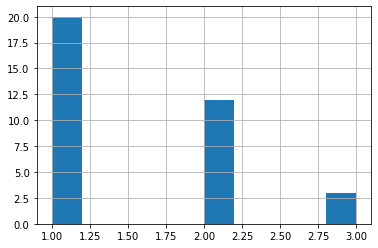

In [11]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/lottery_1.0.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'lottery'
out_df['threshold'] = 1.0
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

### New York  

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


AxesSubplot(0.125,0.125;0.775x0.755)


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,White,145,7.586207,6.896552,49.655172,44.137931,8.275862,10.344828,14.482759,5.517241,new_york,0.0
1,Hispanic,233,6.866953,8.583691,50.214592,48.068670,15.879828,18.454936,18.025751,9.012876,new_york,0.0
2,Black or African American,50,12.000000,14.000000,58.000000,40.000000,20.000000,8.000000,38.000000,8.000000,new_york,0.0
3,Unknown,14,7.142857,14.285714,85.714286,71.428571,7.142857,7.142857,7.142857,0.000000,new_york,0.0
4,Other Race,29,0.000000,3.448276,55.172414,48.275862,13.793103,20.689655,27.586207,10.344828,new_york,0.0
5,Asian,7,14.285714,0.000000,57.142857,42.857143,28.571429,28.571429,28.571429,0.000000,new_york,0.0
6,American Indian/Alaska Native,3,0.000000,0.000000,66.666667,66.666667,0.000000,0.000000,0.000000,0.000000,new_york,0.0
7,Decline to Specify,6,33.333333,0.000000,50.000000,50.000000,0.000000,16.666667,16.666667,16.666667,new_york,0.0


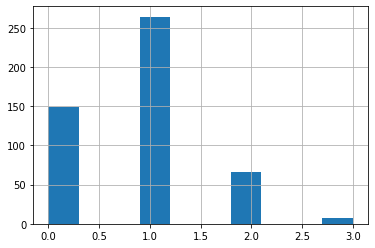

In [12]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/new_york_0.0.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'new_york'
out_df['threshold'] = 0.0
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,White,113,7.079646,7.964602,50.442478,44.247788,5.309735,8.849558,14.159292,5.309735,new_york,0.2
1,Hispanic,179,7.821229,8.379888,48.603352,47.486034,15.642458,17.318436,17.877095,9.497207,new_york,0.2
2,Other Race,19,0.000000,0.000000,57.894737,42.105263,21.052632,15.789474,42.105263,10.526316,new_york,0.2
3,Black or African American,43,13.953488,16.279070,55.813953,37.209302,23.255814,9.302326,39.534884,9.302326,new_york,0.2
4,Unknown,14,7.142857,14.285714,85.714286,71.428571,7.142857,7.142857,7.142857,0.000000,new_york,0.2
5,Decline to Specify,6,33.333333,0.000000,50.000000,50.000000,0.000000,16.666667,16.666667,16.666667,new_york,0.2
6,American Indian/Alaska Native,2,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,new_york,0.2
7,Asian,4,25.000000,0.000000,50.000000,50.000000,25.000000,50.000000,50.000000,0.000000,new_york,0.2


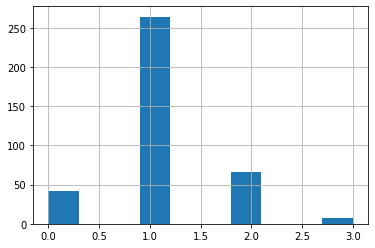

In [13]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/new_york_0.2.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'new_york'
out_df['threshold'] = 0.2
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,131,9.160305,6.870229,50.381679,44.274809,18.320611,20.610687,21.374046,9.923664,new_york,0.4
1,Black or African American,34,14.705882,8.823529,58.823529,35.294118,26.470588,11.764706,41.176471,8.823529,new_york,0.4
2,White,85,8.235294,9.411765,50.588235,40.000000,5.882353,9.411765,16.470588,3.529412,new_york,0.4
3,Asian,4,25.000000,0.000000,50.000000,50.000000,25.000000,50.000000,50.000000,0.000000,new_york,0.4
4,Decline to Specify,3,33.333333,0.000000,66.666667,66.666667,0.000000,33.333333,33.333333,0.000000,new_york,0.4
5,Other Race,11,0.000000,0.000000,72.727273,27.272727,9.090909,9.090909,45.454545,18.181818,new_york,0.4
6,Unknown,11,9.090909,18.181818,90.909091,72.727273,9.090909,9.090909,9.090909,0.000000,new_york,0.4
7,American Indian/Alaska Native,1,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,new_york,0.4


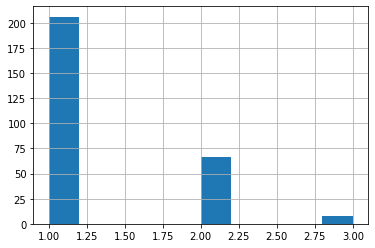

In [14]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/new_york_0.4.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'new_york'
out_df['threshold'] = 0.4
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


AxesSubplot(0.125,0.125;0.775x0.755)


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Black or African American,26,15.384615,7.692308,69.230769,30.769231,23.076923,7.692308,42.307692,3.846154,new_york,0.6
1,Hispanic,89,8.988764,5.617978,50.561798,48.314607,20.224719,14.606742,14.606742,10.112360,new_york,0.6
2,Other Race,6,0.000000,0.000000,100.000000,50.000000,16.666667,0.000000,50.000000,33.333333,new_york,0.6
3,White,52,9.615385,7.692308,51.923077,48.076923,1.923077,5.769231,15.384615,5.769231,new_york,0.6
4,Unknown,8,0.000000,0.000000,87.500000,62.500000,12.500000,0.000000,0.000000,0.000000,new_york,0.6
5,American Indian/Alaska Native,2,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,new_york,0.6
6,Decline to Specify,2,50.000000,0.000000,50.000000,0.000000,0.000000,50.000000,50.000000,0.000000,new_york,0.6
7,Asian,2,0.000000,0.000000,50.000000,0.000000,50.000000,100.000000,100.000000,0.000000,new_york,0.6


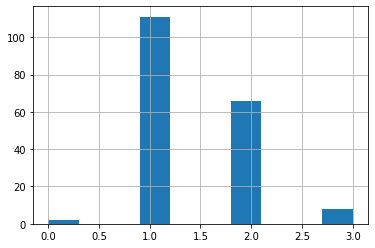

In [15]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/new_york_0.6.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'new_york'
out_df['threshold'] = 0.6
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,49,8.163265,0.000000,59.183673,44.897959,16.326531,12.244898,22.448980,18.367347,new_york,0.8
1,White,27,7.407407,3.703704,55.555556,51.851852,0.000000,0.000000,14.814815,0.000000,new_york,0.8
2,Other Race,7,14.285714,0.000000,100.000000,14.285714,0.000000,14.285714,42.857143,14.285714,new_york,0.8
3,Unknown,2,50.000000,0.000000,100.000000,50.000000,50.000000,50.000000,50.000000,0.000000,new_york,0.8
4,Black or African American,13,30.769231,0.000000,53.846154,15.384615,15.384615,15.384615,30.769231,7.692308,new_york,0.8
5,Asian,1,0.000000,0.000000,100.000000,0.000000,100.000000,100.000000,100.000000,0.000000,new_york,0.8
6,Decline to Specify,1,100.000000,0.000000,100.000000,0.000000,0.000000,100.000000,100.000000,0.000000,new_york,0.8


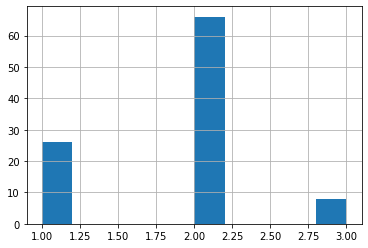

In [16]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/new_york_0.8.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'new_york'
out_df['threshold'] = 0.8
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Other Race,3,0.000000,0.0,66.666667,66.666667,0.000000,0.000000,33.333333,0.000000,new_york,1.0
1,Hispanic,12,0.000000,0.0,58.333333,25.000000,8.333333,33.333333,8.333333,0.000000,new_york,1.0
2,Black or African American,7,14.285714,0.0,57.142857,42.857143,0.000000,14.285714,28.571429,42.857143,new_york,1.0
3,White,10,0.000000,10.0,50.000000,30.000000,0.000000,0.000000,20.000000,0.000000,new_york,1.0
4,Unknown,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,new_york,1.0


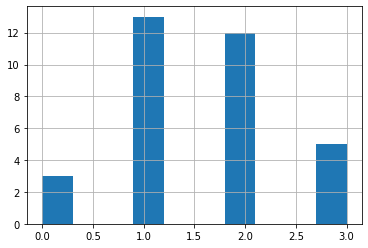

In [17]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/new_york_1.0.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100


out_df['type'] = 'new_york'
out_df['threshold'] = 1.0
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

### Maryland

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,White,145,7.586207,6.896552,49.655172,44.137931,8.275862,10.344828,14.482759,5.517241,maryland,0.0
1,Black or African American,50,12.000000,14.000000,58.000000,40.000000,20.000000,8.000000,38.000000,8.000000,maryland,0.0
2,Hispanic,233,6.866953,8.583691,50.214592,48.068670,15.879828,18.454936,18.025751,9.012876,maryland,0.0
3,Other Race,29,0.000000,3.448276,55.172414,48.275862,13.793103,20.689655,27.586207,10.344828,maryland,0.0
4,Asian,7,14.285714,0.000000,57.142857,42.857143,28.571429,28.571429,28.571429,0.000000,maryland,0.0
5,American Indian/Alaska Native,3,0.000000,0.000000,66.666667,66.666667,0.000000,0.000000,0.000000,0.000000,maryland,0.0
6,Unknown,14,7.142857,14.285714,85.714286,71.428571,7.142857,7.142857,7.142857,0.000000,maryland,0.0
7,Decline to Specify,6,33.333333,0.000000,50.000000,50.000000,0.000000,16.666667,16.666667,16.666667,maryland,0.0


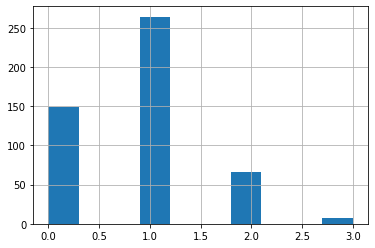

In [18]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/maryland_0.0.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'maryland'
out_df['threshold'] = 0.0
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Black or African American,43,13.953488,16.279070,58.139535,39.534884,23.255814,9.302326,39.534884,9.302326,maryland,0.2
1,Hispanic,184,8.152174,8.152174,55.978261,48.369565,19.565217,23.369565,20.652174,8.695652,maryland,0.2
2,Asian,5,20.000000,0.000000,60.000000,60.000000,40.000000,40.000000,40.000000,0.000000,maryland,0.2
3,Other Race,19,0.000000,5.263158,68.421053,47.368421,15.789474,26.315789,42.105263,15.789474,maryland,0.2
4,White,108,10.185185,9.259259,51.851852,44.444444,9.259259,12.037037,16.666667,6.481481,maryland,0.2
5,Decline to Specify,6,33.333333,0.000000,50.000000,50.000000,0.000000,16.666667,16.666667,16.666667,maryland,0.2
6,Unknown,13,7.692308,15.384615,84.615385,69.230769,7.692308,7.692308,7.692308,0.000000,maryland,0.2
7,American Indian/Alaska Native,2,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,maryland,0.2


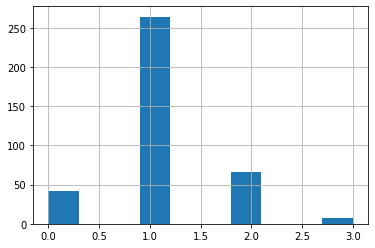

In [19]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/maryland_0.2.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'maryland'
out_df['threshold'] = 0.2
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Black or African American,39,15.384615,15.384615,58.974359,38.461538,25.641026,10.256410,43.589744,10.256410,maryland,0.4
1,Decline to Specify,5,40.000000,0.000000,60.000000,60.000000,0.000000,20.000000,20.000000,20.000000,maryland,0.4
2,White,81,9.876543,11.111111,62.962963,54.320988,7.407407,12.345679,19.753086,7.407407,maryland,0.4
3,Unknown,12,8.333333,16.666667,91.666667,75.000000,8.333333,8.333333,8.333333,0.000000,maryland,0.4
4,Hispanic,128,10.937500,7.812500,60.156250,55.468750,19.531250,21.875000,22.656250,10.156250,maryland,0.4
5,Other Race,16,0.000000,0.000000,68.750000,37.500000,18.750000,18.750000,50.000000,12.500000,maryland,0.4
6,American Indian/Alaska Native,2,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,maryland,0.4
7,Asian,4,25.000000,0.000000,50.000000,50.000000,25.000000,50.000000,50.000000,0.000000,maryland,0.4


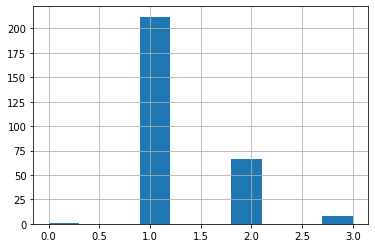

In [20]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/maryland_0.4.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'maryland'
out_df['threshold'] = 0.4
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,96,13.541667,8.333333,62.500000,54.166667,25.000000,23.958333,28.125000,10.416667,maryland,0.6
1,White,57,14.035088,8.771930,68.421053,57.894737,10.526316,17.543860,26.315789,10.526316,maryland,0.6
2,Other Race,12,0.000000,0.000000,91.666667,50.000000,25.000000,8.333333,50.000000,16.666667,maryland,0.6
3,Black or African American,31,19.354839,16.129032,64.516129,32.258065,29.032258,12.903226,48.387097,12.903226,maryland,0.6
4,Asian,4,25.000000,0.000000,50.000000,50.000000,25.000000,50.000000,50.000000,0.000000,maryland,0.6
5,American Indian/Alaska Native,1,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,maryland,0.6
6,Unknown,7,14.285714,28.571429,85.714286,85.714286,14.285714,14.285714,14.285714,0.000000,maryland,0.6
7,Decline to Specify,3,66.666667,0.000000,100.000000,66.666667,0.000000,33.333333,33.333333,33.333333,maryland,0.6


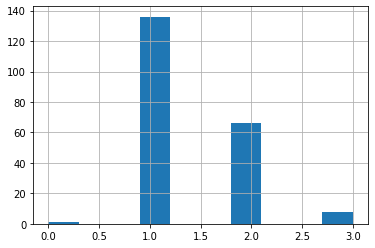

In [21]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/maryland_0.6.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'maryland'
out_df['threshold'] = 0.6
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


AxesSubplot(0.125,0.125;0.775x0.755)


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,53,15.094340,5.660377,62.264151,43.396226,24.528302,20.754717,33.962264,13.207547,maryland,0.8
1,White,21,14.285714,4.761905,61.904762,38.095238,4.761905,14.285714,19.047619,0.000000,maryland,0.8
2,Decline to Specify,3,66.666667,0.000000,66.666667,33.333333,0.000000,33.333333,33.333333,33.333333,maryland,0.8
3,Black or African American,17,29.411765,5.882353,58.823529,29.411765,23.529412,11.764706,41.176471,5.882353,maryland,0.8
4,Unknown,3,33.333333,33.333333,66.666667,66.666667,33.333333,33.333333,33.333333,0.000000,maryland,0.8
5,Other Race,4,0.000000,0.000000,100.000000,25.000000,0.000000,0.000000,50.000000,25.000000,maryland,0.8
6,Asian,1,0.000000,0.000000,100.000000,0.000000,100.000000,100.000000,100.000000,0.000000,maryland,0.8


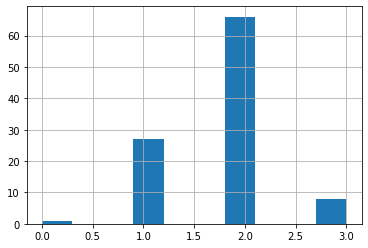

In [22]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/maryland_0.8.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'maryland'
out_df['threshold'] = 0.8
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,17,5.882353,0.0,47.058824,41.176471,5.882353,5.882353,17.647059,5.882353,maryland,1.0
1,Other Race,4,0.000000,0.0,100.000000,25.000000,0.000000,25.000000,50.000000,25.000000,maryland,1.0
2,White,11,0.000000,0.0,45.454545,81.818182,9.090909,0.000000,0.000000,0.000000,maryland,1.0
3,American Indian/Alaska Native,1,0.000000,0.0,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,maryland,1.0
4,Black or African American,3,0.000000,0.0,33.333333,0.000000,33.333333,0.000000,66.666667,0.000000,maryland,1.0


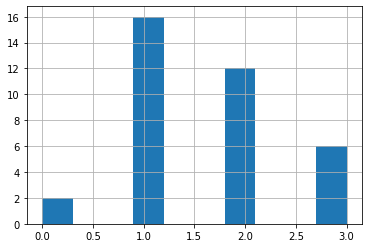

In [23]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/maryland_1.0.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'maryland'
out_df['threshold'] = 1.0
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

### Sickest First

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,233,6.866953,8.583691,50.214592,48.068670,15.879828,18.454936,18.025751,9.012876,sickest,0.0
1,White,145,7.586207,6.896552,49.655172,44.137931,8.275862,10.344828,14.482759,5.517241,sickest,0.0
2,Decline to Specify,6,33.333333,0.000000,50.000000,50.000000,0.000000,16.666667,16.666667,16.666667,sickest,0.0
3,Other Race,29,0.000000,3.448276,55.172414,48.275862,13.793103,20.689655,27.586207,10.344828,sickest,0.0
4,Black or African American,50,12.000000,14.000000,58.000000,40.000000,20.000000,8.000000,38.000000,8.000000,sickest,0.0
5,Unknown,14,7.142857,14.285714,85.714286,71.428571,7.142857,7.142857,7.142857,0.000000,sickest,0.0
6,Asian,7,14.285714,0.000000,57.142857,42.857143,28.571429,28.571429,28.571429,0.000000,sickest,0.0
7,American Indian/Alaska Native,3,0.000000,0.000000,66.666667,66.666667,0.000000,0.000000,0.000000,0.000000,sickest,0.0


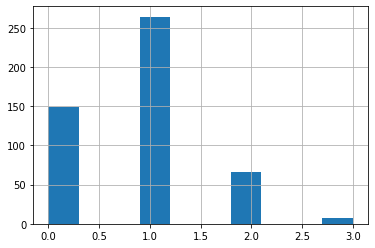

In [24]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/sickest_0.0.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'sickest'
out_df['threshold'] = 0.0
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Unknown,14,7.142857,14.285714,85.714286,71.428571,7.142857,7.142857,7.142857,0.000000,sickest,0.2
1,Hispanic,197,7.614213,9.644670,46.700508,48.730964,15.228426,18.781726,16.751269,7.614213,sickest,0.2
2,White,127,6.299213,7.874016,49.606299,43.307087,8.661417,11.023622,14.960630,5.511811,sickest,0.2
3,Other Race,25,0.000000,4.000000,48.000000,52.000000,16.000000,24.000000,24.000000,8.000000,sickest,0.2
4,Black or African American,35,5.714286,20.000000,60.000000,45.714286,20.000000,5.714286,40.000000,8.571429,sickest,0.2
5,Decline to Specify,4,25.000000,0.000000,25.000000,50.000000,0.000000,0.000000,0.000000,25.000000,sickest,0.2
6,American Indian/Alaska Native,3,0.000000,0.000000,66.666667,66.666667,0.000000,0.000000,0.000000,0.000000,sickest,0.2
7,Asian,6,16.666667,0.000000,50.000000,50.000000,16.666667,16.666667,16.666667,0.000000,sickest,0.2


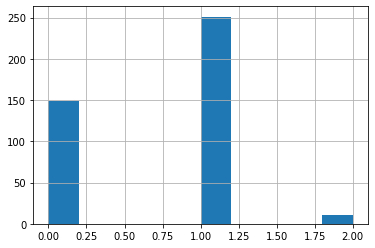

In [25]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/sickest_0.2.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'sickest'
out_df['threshold'] = 0.2
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


AxesSubplot(0.125,0.125;0.775x0.755)


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,White,97,8.247423,8.247423,43.298969,45.360825,9.278351,11.340206,15.463918,4.123711,sickest,0.4
1,Hispanic,158,6.962025,10.126582,47.468354,50.000000,15.822785,16.455696,13.924051,7.594937,sickest,0.4
2,Black or African American,27,3.703704,18.518519,59.259259,44.444444,14.814815,3.703704,37.037037,7.407407,sickest,0.4
3,Unknown,9,11.111111,22.222222,88.888889,66.666667,0.000000,11.111111,11.111111,0.000000,sickest,0.4
4,Other Race,19,0.000000,5.263158,47.368421,52.631579,15.789474,21.052632,10.526316,10.526316,sickest,0.4
5,Asian,5,0.000000,0.000000,60.000000,40.000000,20.000000,20.000000,20.000000,0.000000,sickest,0.4
6,Decline to Specify,1,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,sickest,0.4
7,American Indian/Alaska Native,2,0.000000,0.000000,50.000000,50.000000,0.000000,0.000000,0.000000,0.000000,sickest,0.4


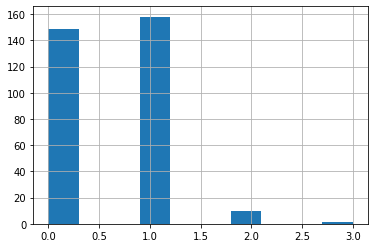

In [26]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/sickest_0.4.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'sickest'
out_df['threshold'] = 0.4
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


AxesSubplot(0.125,0.125;0.775x0.755)


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Black or African American,15,0.000000,20.000000,73.333333,60.000000,13.333333,0.000000,20.000000,6.666667,sickest,0.6
1,Hispanic,117,5.128205,11.111111,48.717949,49.572650,16.239316,16.239316,13.675214,8.547009,sickest,0.6
2,Unknown,7,14.285714,14.285714,85.714286,57.142857,14.285714,28.571429,28.571429,0.000000,sickest,0.6
3,White,72,9.722222,6.944444,40.277778,43.055556,12.500000,12.500000,15.277778,4.166667,sickest,0.6
4,Asian,4,0.000000,0.000000,75.000000,50.000000,25.000000,0.000000,0.000000,0.000000,sickest,0.6
5,Other Race,16,0.000000,6.250000,43.750000,56.250000,18.750000,18.750000,12.500000,12.500000,sickest,0.6
6,American Indian/Alaska Native,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sickest,0.6


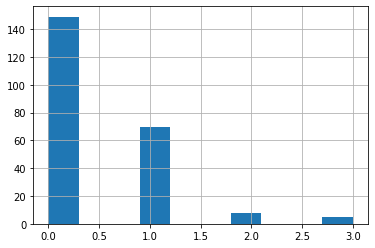

In [27]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/sickest_0.6.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'sickest'
out_df['threshold'] = 0.6
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,74,2.702703,12.162162,50.000000,50.000000,13.513514,16.216216,14.864865,6.756757,sickest,0.8
1,White,37,0.000000,2.702703,43.243243,56.756757,10.810811,5.405405,8.108108,0.000000,sickest,0.8
2,Other Race,12,0.000000,8.333333,33.333333,58.333333,8.333333,16.666667,8.333333,8.333333,sickest,0.8
3,Unknown,3,0.000000,0.000000,66.666667,66.666667,33.333333,33.333333,33.333333,0.000000,sickest,0.8
4,Black or African American,15,6.666667,6.666667,60.000000,46.666667,13.333333,13.333333,26.666667,20.000000,sickest,0.8
5,Decline to Specify,1,100.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,100.000000,sickest,0.8
6,Asian,3,0.000000,0.000000,66.666667,33.333333,33.333333,0.000000,0.000000,0.000000,sickest,0.8
7,American Indian/Alaska Native,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sickest,0.8


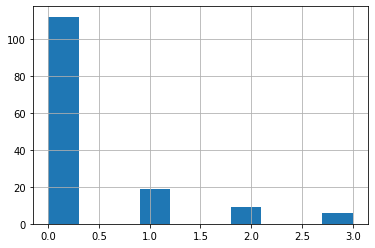

In [28]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/sickest_0.8.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'sickest'
out_df['threshold'] = 0.8
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,White,10,10.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,10.000000,sickest,1.0
1,Decline to Specify,1,100.000000,0.000000,100.000000,0.000000,0.000000,100.000000,100.000000,0.000000,sickest,1.0
2,Unknown,6,16.666667,0.000000,83.333333,50.000000,33.333333,33.333333,33.333333,0.000000,sickest,1.0
3,Black or African American,3,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,sickest,1.0
4,Hispanic,12,8.333333,8.333333,41.666667,50.000000,8.333333,25.000000,16.666667,8.333333,sickest,1.0
5,Other Race,2,0.000000,0.000000,50.000000,100.000000,0.000000,50.000000,50.000000,0.000000,sickest,1.0


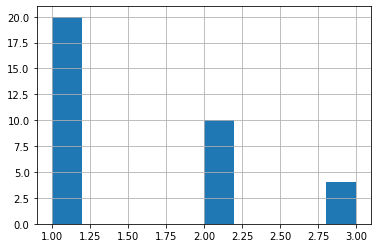

In [29]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/sickest_1.0.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'sickest'
out_df['threshold'] = 1.0
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


AxesSubplot(0.125,0.125;0.775x0.755)


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,233,6.866953,8.583691,50.214592,48.068670,15.879828,18.454936,18.025751,9.012876,youngest,0.0
1,White,145,7.586207,6.896552,49.655172,44.137931,8.275862,10.344828,14.482759,5.517241,youngest,0.0
2,Asian,7,14.285714,0.000000,57.142857,42.857143,28.571429,28.571429,28.571429,0.000000,youngest,0.0
3,Other Race,29,0.000000,3.448276,55.172414,48.275862,13.793103,20.689655,27.586207,10.344828,youngest,0.0
4,Black or African American,50,12.000000,14.000000,58.000000,40.000000,20.000000,8.000000,38.000000,8.000000,youngest,0.0
5,Unknown,14,7.142857,14.285714,85.714286,71.428571,7.142857,7.142857,7.142857,0.000000,youngest,0.0
6,Decline to Specify,6,33.333333,0.000000,50.000000,50.000000,0.000000,16.666667,16.666667,16.666667,youngest,0.0
7,American Indian/Alaska Native,3,0.000000,0.000000,66.666667,66.666667,0.000000,0.000000,0.000000,0.000000,youngest,0.0


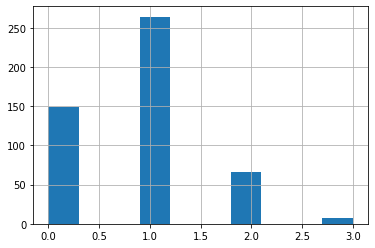

In [30]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/youngest_0.0.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'youngest'
out_df['threshold'] = 0.0
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,White,116,9.482759,6.896552,55.172414,50.862069,10.344828,12.931034,18.103448,6.896552,youngest,0.2
1,Hispanic,194,8.247423,8.247423,54.123711,51.546392,19.072165,21.649485,19.072165,8.762887,youngest,0.2
2,Black or African American,45,13.333333,15.555556,60.000000,42.222222,22.222222,8.888889,40.000000,8.888889,youngest,0.2
3,Unknown,13,7.692308,15.384615,92.307692,76.923077,7.692308,7.692308,7.692308,0.000000,youngest,0.2
4,Other Race,22,0.000000,4.545455,59.090909,59.090909,18.181818,22.727273,36.363636,13.636364,youngest,0.2
5,American Indian/Alaska Native,3,0.000000,0.000000,66.666667,66.666667,0.000000,0.000000,0.000000,0.000000,youngest,0.2
6,Asian,6,16.666667,0.000000,66.666667,50.000000,33.333333,33.333333,33.333333,0.000000,youngest,0.2
7,Decline to Specify,5,40.000000,0.000000,60.000000,60.000000,0.000000,20.000000,20.000000,20.000000,youngest,0.2


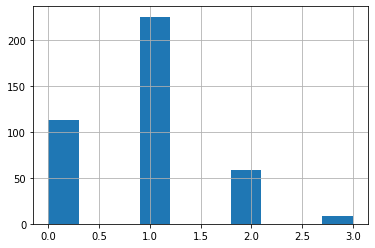

In [31]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/youngest_0.2.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'youngest'
out_df['threshold'] = 0.2
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Unknown,11,9.090909,18.181818,81.818182,72.727273,9.090909,9.090909,9.090909,0.000000,youngest,0.4
1,Hispanic,158,9.493671,8.227848,58.227848,56.962025,22.151899,24.050633,21.518987,8.227848,youngest,0.4
2,White,92,11.956522,5.434783,53.260870,52.173913,8.695652,13.043478,21.739130,8.695652,youngest,0.4
3,Other Race,18,0.000000,5.555556,61.111111,55.555556,16.666667,22.222222,33.333333,16.666667,youngest,0.4
4,Decline to Specify,5,40.000000,0.000000,60.000000,60.000000,0.000000,20.000000,20.000000,20.000000,youngest,0.4
5,Black or African American,33,15.151515,18.181818,63.636364,51.515152,27.272727,3.030303,42.424242,9.090909,youngest,0.4
6,Asian,5,20.000000,0.000000,60.000000,40.000000,40.000000,40.000000,40.000000,0.000000,youngest,0.4
7,American Indian/Alaska Native,2,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,youngest,0.4


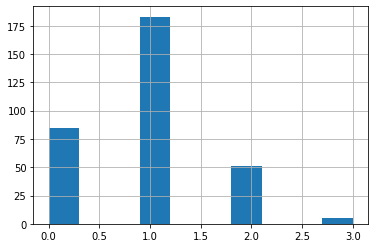

In [32]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/youngest_0.4.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'youngest'
out_df['threshold'] = 0.4
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,113,9.734513,6.194690,56.637168,60.176991,24.778761,19.469027,20.353982,10.619469,youngest,0.6
1,White,73,15.068493,4.109589,53.424658,54.794521,10.958904,16.438356,26.027397,9.589041,youngest,0.6
2,Black or African American,26,15.384615,19.230769,61.538462,50.000000,23.076923,0.000000,38.461538,3.846154,youngest,0.6
3,Other Race,14,0.000000,7.142857,71.428571,57.142857,14.285714,21.428571,35.714286,14.285714,youngest,0.6
4,American Indian/Alaska Native,2,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,youngest,0.6
5,Asian,3,33.333333,0.000000,33.333333,33.333333,33.333333,66.666667,66.666667,0.000000,youngest,0.6
6,Unknown,4,25.000000,0.000000,100.000000,75.000000,25.000000,25.000000,25.000000,0.000000,youngest,0.6
7,Decline to Specify,3,66.666667,0.000000,100.000000,66.666667,0.000000,33.333333,33.333333,33.333333,youngest,0.6


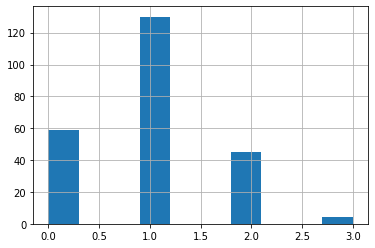

In [33]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/youngest_0.6.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'youngest'
out_df['threshold'] = 0.6
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Other Race,13,0.000000,7.692308,76.923077,46.153846,7.692308,23.076923,30.769231,7.692308,youngest,0.8
1,Hispanic,70,8.571429,7.142857,58.571429,51.428571,25.714286,24.285714,22.857143,7.142857,youngest,0.8
2,Black or African American,17,23.529412,11.764706,35.294118,29.411765,17.647059,0.000000,35.294118,5.882353,youngest,0.8
3,White,40,20.000000,5.000000,47.500000,55.000000,12.500000,22.500000,27.500000,15.000000,youngest,0.8
4,Unknown,3,33.333333,0.000000,100.000000,66.666667,33.333333,33.333333,33.333333,0.000000,youngest,0.8
5,Decline to Specify,2,100.000000,0.000000,100.000000,50.000000,0.000000,50.000000,50.000000,50.000000,youngest,0.8
6,Asian,1,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000,youngest,0.8


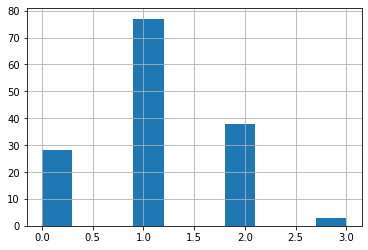

In [34]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/youngest_0.8.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'youngest'
out_df['threshold'] = 0.8
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,17,5.882353,11.764706,47.058824,41.176471,11.764706,17.647059,29.411765,11.764706,youngest,1.0
1,Black or African American,4,0.000000,0.000000,50.000000,25.000000,25.000000,0.000000,25.000000,0.000000,youngest,1.0
2,White,9,0.000000,11.111111,33.333333,44.444444,0.000000,0.000000,0.000000,0.000000,youngest,1.0
3,Unknown,3,0.000000,0.000000,100.000000,66.666667,33.333333,33.333333,0.000000,0.000000,youngest,1.0
4,Asian,1,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,youngest,1.0
5,Other Race,1,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,0.000000,youngest,1.0


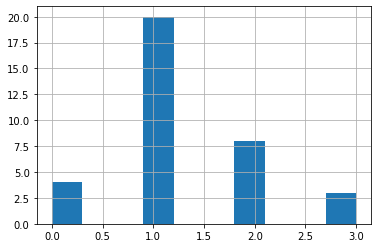

In [35]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/youngest_1.0.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'youngest'
out_df['threshold'] = 1.0
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

### Max Life Years

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,White,145,7.586207,6.896552,49.655172,44.137931,8.275862,10.344828,14.482759,5.517241,max_life_years,0.0
1,Asian,7,14.285714,0.000000,57.142857,42.857143,28.571429,28.571429,28.571429,0.000000,max_life_years,0.0
2,Other Race,29,0.000000,3.448276,55.172414,48.275862,13.793103,20.689655,27.586207,10.344828,max_life_years,0.0
3,Hispanic,233,6.866953,8.583691,50.214592,48.068670,15.879828,18.454936,18.025751,9.012876,max_life_years,0.0
4,Black or African American,50,12.000000,14.000000,58.000000,40.000000,20.000000,8.000000,38.000000,8.000000,max_life_years,0.0
5,Unknown,14,7.142857,14.285714,85.714286,71.428571,7.142857,7.142857,7.142857,0.000000,max_life_years,0.0
6,American Indian/Alaska Native,3,0.000000,0.000000,66.666667,66.666667,0.000000,0.000000,0.000000,0.000000,max_life_years,0.0
7,Decline to Specify,6,33.333333,0.000000,50.000000,50.000000,0.000000,16.666667,16.666667,16.666667,max_life_years,0.0


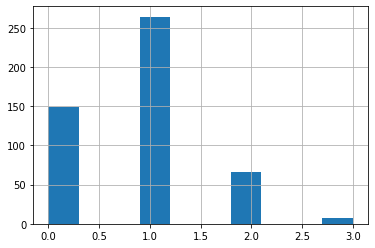

In [36]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/max_life_years_0.0.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'max_life_years'
out_df['threshold'] = 0.0
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,White,117,9.401709,7.692308,50.427350,45.299145,8.547009,11.111111,16.239316,5.982906,max_life_years,0.2
1,Hispanic,181,8.287293,6.629834,51.381215,49.723757,16.022099,18.232044,18.232044,9.944751,max_life_years,0.2
2,Black or African American,42,14.285714,14.285714,54.761905,38.095238,23.809524,9.523810,40.476190,9.523810,max_life_years,0.2
3,Other Race,19,0.000000,5.263158,68.421053,47.368421,15.789474,21.052632,42.105263,10.526316,max_life_years,0.2
4,Unknown,13,7.692308,15.384615,84.615385,69.230769,7.692308,7.692308,7.692308,0.000000,max_life_years,0.2
5,Decline to Specify,6,33.333333,0.000000,50.000000,50.000000,0.000000,16.666667,16.666667,16.666667,max_life_years,0.2
6,Asian,4,25.000000,0.000000,50.000000,50.000000,25.000000,50.000000,50.000000,0.000000,max_life_years,0.2
7,American Indian/Alaska Native,2,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,max_life_years,0.2


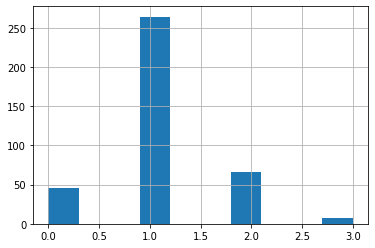

In [37]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/max_life_years_0.2.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'max_life_years'
out_df['threshold'] = 0.2
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,129,10.077519,6.201550,51.937984,51.162791,19.379845,20.155039,19.379845,7.751938,max_life_years,0.4
1,White,85,9.411765,8.235294,52.941176,50.588235,7.058824,11.764706,18.823529,7.058824,max_life_years,0.4
2,Other Race,15,0.000000,0.000000,66.666667,40.000000,20.000000,20.000000,53.333333,13.333333,max_life_years,0.4
3,Unknown,12,8.333333,16.666667,91.666667,75.000000,8.333333,8.333333,8.333333,0.000000,max_life_years,0.4
4,Black or African American,38,15.789474,15.789474,55.263158,34.210526,26.315789,10.526316,44.736842,10.526316,max_life_years,0.4
5,Asian,4,25.000000,0.000000,50.000000,50.000000,25.000000,50.000000,50.000000,0.000000,max_life_years,0.4
6,Decline to Specify,5,40.000000,0.000000,60.000000,60.000000,0.000000,20.000000,20.000000,20.000000,max_life_years,0.4
7,American Indian/Alaska Native,2,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,max_life_years,0.4


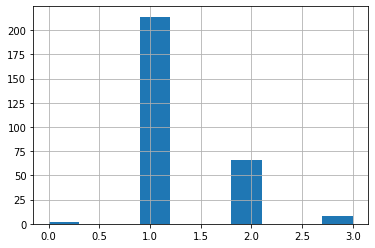

In [38]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/max_life_years_0.4.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'max_life_years'
out_df['threshold'] = 0.4
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


AxesSubplot(0.125,0.125;0.775x0.755)


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,96,11.458333,4.166667,53.125000,53.125000,23.958333,16.666667,19.791667,9.375000,max_life_years,0.6
1,Black or African American,27,18.518519,14.814815,51.851852,33.333333,22.222222,7.407407,40.740741,11.111111,max_life_years,0.6
2,White,60,13.333333,3.333333,50.000000,48.333333,6.666667,16.666667,23.333333,10.000000,max_life_years,0.6
3,Other Race,12,0.000000,0.000000,75.000000,41.666667,16.666667,16.666667,41.666667,16.666667,max_life_years,0.6
4,American Indian/Alaska Native,2,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,max_life_years,0.6
5,Asian,3,33.333333,0.000000,33.333333,33.333333,33.333333,66.666667,66.666667,0.000000,max_life_years,0.6
6,Unknown,4,25.000000,0.000000,100.000000,75.000000,25.000000,25.000000,25.000000,0.000000,max_life_years,0.6
7,Decline to Specify,3,66.666667,0.000000,100.000000,66.666667,0.000000,33.333333,33.333333,33.333333,max_life_years,0.6


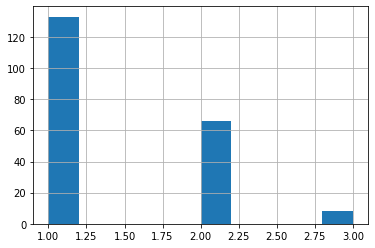

In [39]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/max_life_years_0.6.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'max_life_years'
out_df['threshold'] = 0.6
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

AxesSubplot(0.125,0.125;0.775x0.755)


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,54,7.407407,0.000000,50.000000,42.592593,22.222222,14.814815,22.222222,12.962963,max_life_years,0.8
1,White,24,8.333333,8.333333,66.666667,45.833333,0.000000,8.333333,20.833333,0.000000,max_life_years,0.8
2,Unknown,3,0.000000,0.000000,66.666667,66.666667,33.333333,0.000000,0.000000,0.000000,max_life_years,0.8
3,Black or African American,16,31.250000,0.000000,50.000000,25.000000,25.000000,12.500000,37.500000,6.250000,max_life_years,0.8
4,American Indian/Alaska Native,1,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,max_life_years,0.8
5,Asian,2,0.000000,0.000000,50.000000,0.000000,50.000000,100.000000,100.000000,0.000000,max_life_years,0.8
6,Other Race,6,0.000000,0.000000,83.333333,16.666667,0.000000,16.666667,50.000000,16.666667,max_life_years,0.8
7,Decline to Specify,1,100.000000,0.000000,100.000000,0.000000,0.000000,100.000000,100.000000,0.000000,max_life_years,0.8


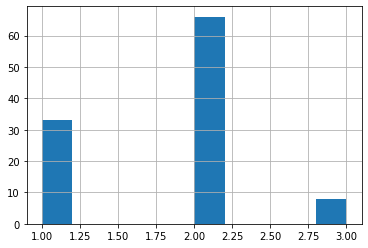

In [40]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/max_life_years_0.8.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'max_life_years'
out_df['threshold'] = 0.8
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


AxesSubplot(0.125,0.125;0.775x0.755)


,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,18,0.0,5.555556,50.000000,72.222222,11.111111,5.555556,16.666667,11.111111,max_life_years,1.0
1,White,9,0.0,11.111111,33.333333,22.222222,0.000000,0.000000,0.000000,0.000000,max_life_years,1.0
2,Black or African American,4,0.0,25.000000,25.000000,50.000000,25.000000,0.000000,25.000000,0.000000,max_life_years,1.0
3,Unknown,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,max_life_years,1.0
4,Other Race,2,0.0,0.000000,50.000000,50.000000,0.000000,0.000000,50.000000,0.000000,max_life_years,1.0


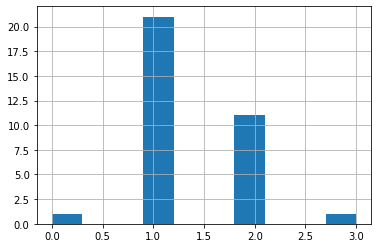

In [41]:
# No ventilators 
lot_1 = pd.read_csv('sim_results/max_life_years_1.0.csv', index_col=False)
mortality_lot_1 = lot_1[lot_1['death'] == 1]
c = Counter(mortality_lot_1['race_display'])
race_df = pd.DataFrame(c.items(), columns=['race_display', 'number_of_patients_who_died'])

all_como = mortality_lot_1.groupby(['race_display'])['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
       'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
       'CKD_com_flag', 'cancer_com_flag'].apply(lambda x : x.astype(int).sum()).reset_index()
out_df = pd.merge(race_df, all_como)
out_df.columns

out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']].div(out_df.number_of_patients_who_died, axis=0)


out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] = out_df[['COPD_com_flag',
       'asthma_com_flag', 'diabetes_com_flag', 'hypertension_com_flag',
       'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag',
       'cancer_com_flag']] * 100

out_df['type'] = 'max_life_years'
out_df['threshold'] = 1.0
all_df_list.append(out_df)

print(mortality_lot_1['qSOFA_score'].hist())
out_df

In [42]:
all_df = pd.concat(all_df_list)

In [43]:
all_df

,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,233,6.866953,8.583691,50.214592,48.068670,15.879828,18.454936,18.025751,9.012876,lottery,0.0
1,Black or African American,50,12.000000,14.000000,58.000000,40.000000,20.000000,8.000000,38.000000,8.000000,lottery,0.0
2,White,145,7.586207,6.896552,49.655172,44.137931,8.275862,10.344828,14.482759,5.517241,lottery,0.0
3,Asian,7,14.285714,0.000000,57.142857,42.857143,28.571429,28.571429,28.571429,0.000000,lottery,0.0
4,Unknown,14,7.142857,14.285714,85.714286,71.428571,7.142857,7.142857,7.142857,0.000000,lottery,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
0,Hispanic,18,0.000000,5.555556,50.000000,72.222222,11.111111,5.555556,16.666667,11.111111,max_life_years,1.0
1,White,9,0.000000,11.111111,33.333333,22.222222,0.000000,0.000000,0.000000,0.000000,max_life_years,1.0
2,Black or African American,4,0.000000,25.000000,25.000000,50.000000,25.000000,0.000000,25.000000,0.000000,max_life_years,1.0
3,Unknown,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,max_life_years,1.0


In [44]:
hispanic_df = all_df[all_df['race_display'] == 'Hispanic']
hispanic_df

,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
0,Hispanic,233,6.866953,8.583691,50.214592,48.068670,15.879828,18.454936,18.025751,9.012876,lottery,0.0
0,Hispanic,197,7.106599,8.121827,51.269036,49.238579,16.243655,16.751269,18.274112,9.137056,lottery,0.2
1,Hispanic,159,6.918239,7.547170,53.459119,47.798742,14.465409,19.496855,19.496855,9.433962,lottery,0.4
1,Hispanic,108,7.407407,8.333333,50.000000,53.703704,10.185185,14.814815,14.814815,9.259259,lottery,0.6
0,Hispanic,54,7.407407,3.703704,42.592593,48.148148,7.407407,14.814815,20.370370,9.259259,lottery,0.8
1,Hispanic,12,0.000000,8.333333,58.333333,66.666667,8.333333,8.333333,16.666667,8.333333,lottery,1.0
1,Hispanic,233,6.866953,8.583691,50.214592,48.068670,15.879828,18.454936,18.025751,9.012876,new_york,0.0
1,Hispanic,179,7.821229,8.379888,48.603352,47.486034,15.642458,17.318436,17.877095,9.497207,new_york,0.2
0,Hispanic,131,9.160305,6.870229,50.381679,44.274809,18.320611,20.610687,21.374046,9.923664,new_york,0.4
1,Hispanic,89,8.988764,5.617978,50.561798,48.314607,20.224719,14.606742,14.606742,10.112360,new_york,0.6


In [45]:
aa_df = all_df[all_df['race_display'] == 'Black or African American']
aa_df

,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
1,Black or African American,50,12.000000,14.000000,58.000000,40.000000,20.000000,8.000000,38.000000,8.000000,lottery,0.0
1,Black or African American,42,11.904762,14.285714,52.380952,45.238095,19.047619,9.523810,30.952381,9.523810,lottery,0.2
4,Black or African American,31,12.903226,16.129032,41.935484,41.935484,22.580645,6.451613,38.709677,9.677419,lottery,0.4
3,Black or African American,20,15.000000,20.000000,35.000000,35.000000,20.000000,5.000000,35.000000,15.000000,lottery,0.6
1,Black or African American,14,14.285714,7.142857,50.000000,21.428571,21.428571,7.142857,57.142857,7.142857,lottery,0.8
3,Black or African American,3,0.000000,33.333333,66.666667,33.333333,33.333333,0.000000,33.333333,33.333333,lottery,1.0
2,Black or African American,50,12.000000,14.000000,58.000000,40.000000,20.000000,8.000000,38.000000,8.000000,new_york,0.0
3,Black or African American,43,13.953488,16.279070,55.813953,37.209302,23.255814,9.302326,39.534884,9.302326,new_york,0.2
1,Black or African American,34,14.705882,8.823529,58.823529,35.294118,26.470588,11.764706,41.176471,8.823529,new_york,0.4
0,Black or African American,26,15.384615,7.692308,69.230769,30.769231,23.076923,7.692308,42.307692,3.846154,new_york,0.6


In [46]:
asian_df = all_df[all_df['race_display'] == 'Asian']
asian_df

,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
3,Asian,7,14.285714,0.0,57.142857,42.857143,28.571429,28.571429,28.571429,0.0,lottery,0.0
3,Asian,6,16.666667,0.0,50.000000,50.000000,33.333333,33.333333,33.333333,0.0,lottery,0.2
7,Asian,3,33.333333,0.0,66.666667,66.666667,33.333333,33.333333,33.333333,0.0,lottery,0.4
6,Asian,2,0.000000,0.0,100.000000,50.000000,50.000000,50.000000,50.000000,0.0,lottery,0.6
6,Asian,1,0.000000,0.0,100.000000,100.000000,0.000000,0.000000,0.000000,0.0,lottery,0.8
5,Asian,7,14.285714,0.0,57.142857,42.857143,28.571429,28.571429,28.571429,0.0,new_york,0.0
7,Asian,4,25.000000,0.0,50.000000,50.000000,25.000000,50.000000,50.000000,0.0,new_york,0.2
3,Asian,4,25.000000,0.0,50.000000,50.000000,25.000000,50.000000,50.000000,0.0,new_york,0.4
7,Asian,2,0.000000,0.0,50.000000,0.000000,50.000000,100.000000,100.000000,0.0,new_york,0.6
5,Asian,1,0.000000,0.0,100.000000,0.000000,100.000000,100.000000,100.000000,0.0,new_york,0.8


In [47]:
white_df = all_df[all_df['race_display'] == 'White']
white_df

,race_display,number_of_patients_who_died,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,type,threshold
2,White,145,7.586207,6.896552,49.655172,44.137931,8.275862,10.344828,14.482759,5.517241,lottery,0.0
5,White,109,10.091743,7.339450,52.293578,44.036697,8.256881,11.926606,13.761468,5.504587,lottery,0.2
3,White,90,8.888889,5.555556,55.555556,43.333333,8.888889,12.222222,13.333333,5.555556,lottery,0.4
0,White,66,9.090909,6.060606,50.000000,40.909091,7.575758,12.121212,12.121212,6.060606,lottery,0.6
3,White,37,13.513514,13.513514,48.648649,37.837838,8.108108,16.216216,16.216216,2.702703,lottery,0.8
0,White,15,0.000000,0.000000,40.000000,40.000000,0.000000,6.666667,20.000000,0.000000,lottery,1.0
0,White,145,7.586207,6.896552,49.655172,44.137931,8.275862,10.344828,14.482759,5.517241,new_york,0.0
0,White,113,7.079646,7.964602,50.442478,44.247788,5.309735,8.849558,14.159292,5.309735,new_york,0.2
2,White,85,8.235294,9.411765,50.588235,40.000000,5.882353,9.411765,16.470588,3.529412,new_york,0.4
3,White,52,9.615385,7.692308,51.923077,48.076923,1.923077,5.769231,15.384615,5.769231,new_york,0.6


In [48]:
type_labels = hispanic_df['type'].unique()

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired Hispanic Patients who had Diabetes')

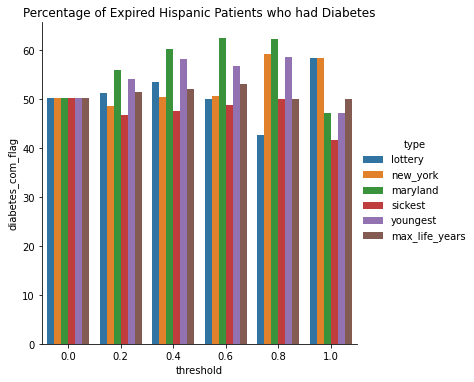

In [65]:
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='diabetes_com_flag', 
                        hue_order = type_labels, hue='type', data=hispanic_df, kind='bar')
plt.title('Percentage of Expired Hispanic Patients who had Diabetes')
#sn_plot.savefig("ny_plot_output.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired Hispanic Patients who had Hypertension')

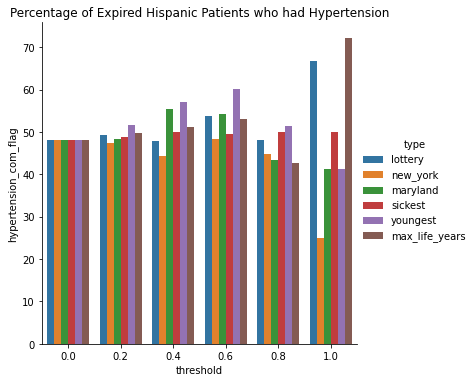

In [66]:
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='hypertension_com_flag', 
                        hue_order = type_labels, hue='type', data=hispanic_df, kind='bar')
plt.title('Percentage of Expired Hispanic Patients who had Hypertension')
#sn_plot.savefig("ny_plot_output.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired Hispanic Patients who had Heart Failure')

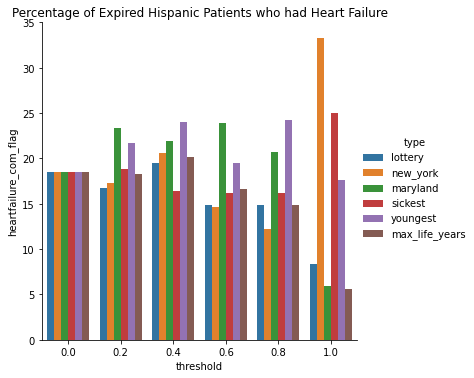

In [67]:
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='heartfailure_com_flag', 
                        hue_order = type_labels, hue='type', data=hispanic_df, kind='bar')
plt.title('Percentage of Expired Hispanic Patients who had Heart Failure')
#sn_plot.savefig("ny_plot_output.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired Hispanic Patients who had Cancer')

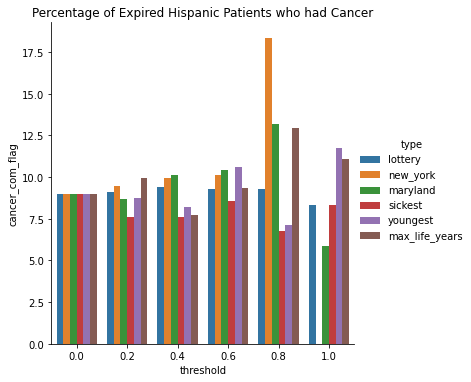

In [68]:
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='cancer_com_flag', 
                        hue_order = type_labels, hue='type', data=hispanic_df, kind='bar')
plt.title('Percentage of Expired Hispanic Patients who had Cancer')
#sn_plot.savefig("ny_plot_output.png")

### African American

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired Black Patients who had Diabetes')

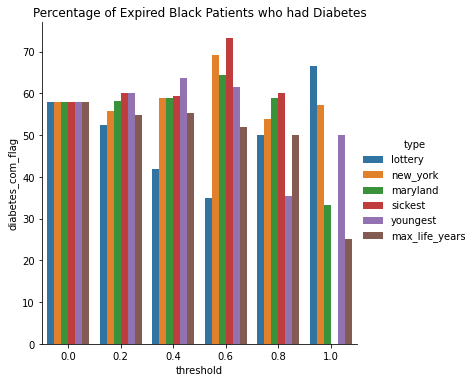

In [69]:
sn_plot = sn.factorplot(x='threshold', y='diabetes_com_flag', 
                        hue_order = type_labels, hue='type', data=aa_df, kind='bar')
plt.title('Percentage of Expired Black Patients who had Diabetes')
#sn_plot.savefig("ny_plot_output.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired Black Patients who had Hypertension')

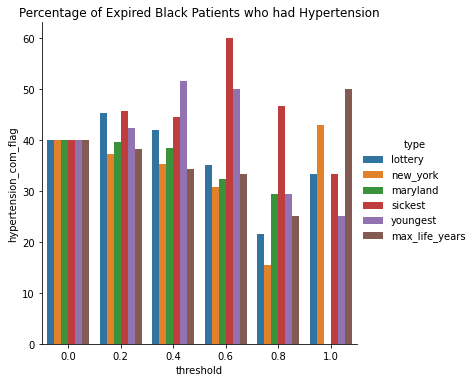

In [70]:
import matplotlib.pyplot as plt
sn_plot = sn.factorplot(x='threshold', y='hypertension_com_flag', 
                        hue_order = type_labels, hue='type', data=aa_df, kind='bar')
plt.title('Percentage of Expired Black Patients who had Hypertension')
#sn_plot.savefig("ny_plot_output.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired Black Patients who had Heart Failure')

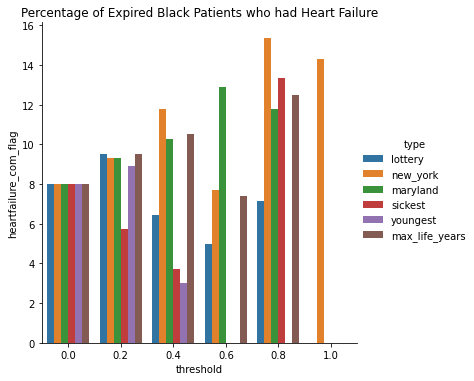

In [71]:
sn_plot = sn.factorplot(x='threshold', y='heartfailure_com_flag', 
                        hue_order = type_labels, hue='type', data=aa_df, kind='bar')
plt.title('Percentage of Expired Black Patients who had Heart Failure')
#sn_plot.savefig("ny_plot_output.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired Black Patients who had Cancer')

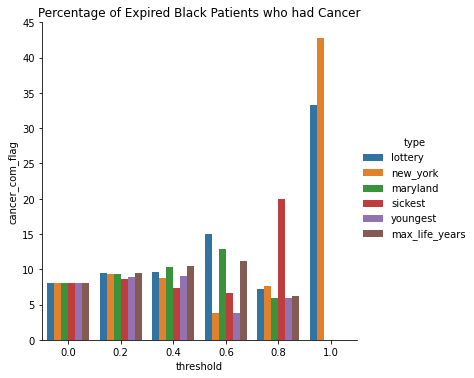

In [72]:
sn_plot = sn.factorplot(x='threshold', y='cancer_com_flag', 
                        hue_order = type_labels, hue='type', data=aa_df, kind='bar')
plt.title('Percentage of Expired Black Patients who had Cancer')
#sn_plot.savefig("ny_plot_output.png")

### Asian

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired Asian Patients who had Diabetes')

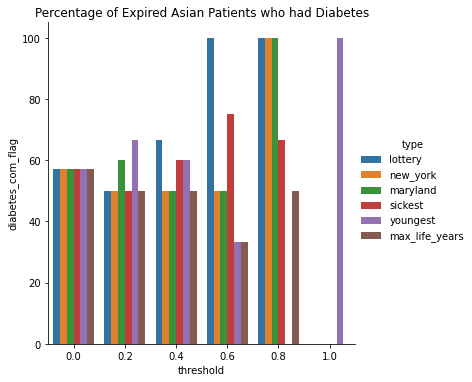

In [73]:
sn_plot = sn.factorplot(x='threshold', y='diabetes_com_flag', 
                        hue_order = type_labels, hue='type', data=asian_df, kind='bar')
plt.title('Percentage of Expired Asian Patients who had Diabetes')
#sn_plot.savefig("ny_plot_output.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired Asian Patients who had Hypertension')

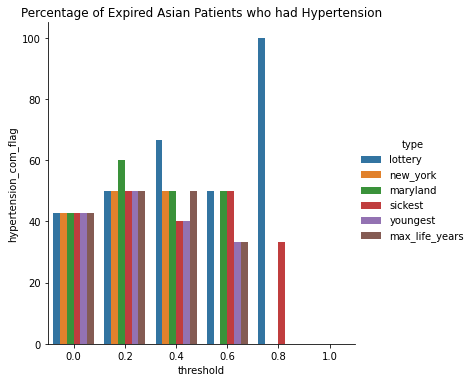

In [74]:
sn_plot = sn.factorplot(x='threshold', y='hypertension_com_flag', 
                        hue_order = type_labels, hue='type', data=asian_df, kind='bar')
plt.title('Percentage of Expired Asian Patients who had Hypertension')
#sn_plot.savefig("ny_plot_output.png")

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired Asian Patients who had Heart Failure')

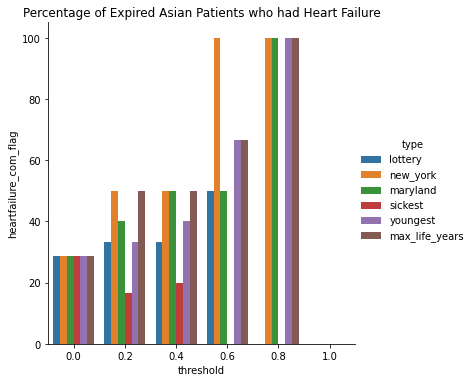

In [75]:
sn_plot = sn.factorplot(x='threshold', y='heartfailure_com_flag', 
                        hue_order = type_labels, hue='type', data=asian_df, kind='bar')
plt.title('Percentage of Expired Asian Patients who had Heart Failure')

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired Asian Patients who have Cancer')

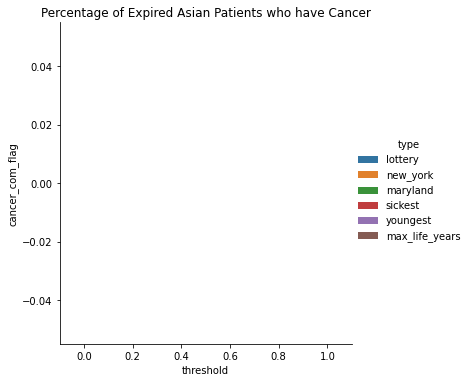

In [60]:
sn_plot = sn.factorplot(x='threshold', y='cancer_com_flag', 
                        hue_order = type_labels, hue='type', data=asian_df, kind='bar')
plt.title('Percentage of Expired Asian Patients who had Cancer')

### White

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired White Patients who had Diabetes')

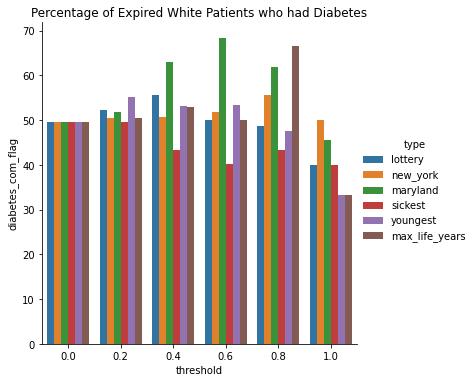

In [76]:
sn_plot = sn.factorplot(x='threshold', y='diabetes_com_flag', 
                        hue_order = type_labels, hue='type', data=white_df, kind='bar')
plt.title('Percentage of Expired White Patients who had Diabetes')

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired White Patients who had Hypertension')

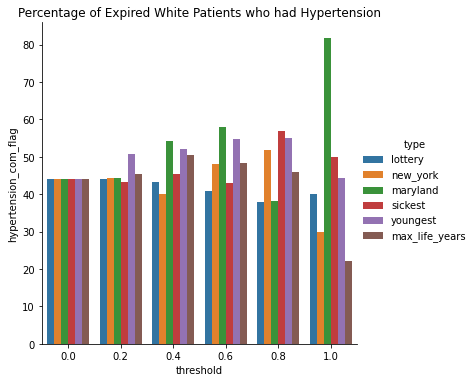

In [62]:
sn_plot = sn.factorplot(x='threshold', y='hypertension_com_flag', 
                        hue_order = type_labels, hue='type', data=white_df, kind='bar')
plt.title('Percentage of Expired White Patients who had Hypertension')

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired White Patients who had Heart Failure')

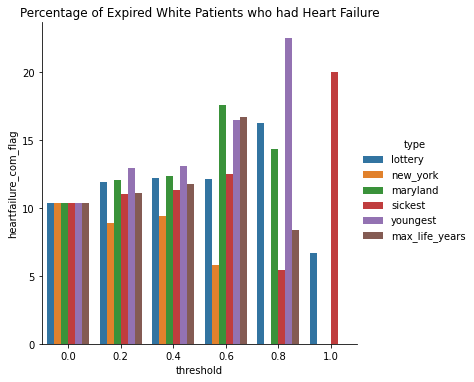

In [77]:
sn_plot = sn.factorplot(x='threshold', y='heartfailure_com_flag', 
                        hue_order = type_labels, hue='type', data=white_df, kind='bar')
plt.title('Percentage of Expired White Patients who had Heart Failure')

/home/joel/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Percentage of Expired White Patients who had Cancer')

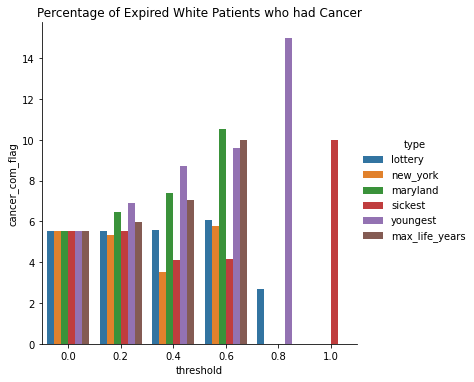

In [64]:
sn_plot = sn.factorplot(x='threshold', y='cancer_com_flag', 
                        hue_order = type_labels, hue='type', data=white_df, kind='bar')
plt.title('Percentage of Expired White Patients who had Cancer')